In [117]:
# Data Mining Project: 
    
# Attempt to create a decision tree to predict if
# someone will recieve a loan or not from a given online dataset 

# Sources:
# https://www.udemy.com/data-science-and-machine-learning-with-python-hands-on/
# https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/
# https://www.datacamp.com/community/tutorials/decision-tree-classification-python


In [118]:
# Importing Library
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Reading the  dataset 
df = pd.read_csv("train.csv")



In [119]:
# Store total num attributes in training dataset
df_length =len(df)



In [120]:
# Numerical variables for training data set

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [121]:

import pandas as pd
# Display education info
df = pd.read_csv("train.csv")

df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

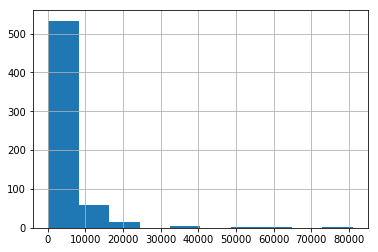

In [122]:


%matplotlib inline

# Histogram of ApplicantIncome

df['ApplicantIncome'].hist()

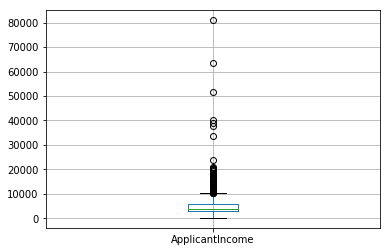

In [123]:
# Box Plot for variable ApplicantIncome of train.csv

df.boxplot(column='ApplicantIncome')

In [124]:
# As we can see above there are lots of outliers in income

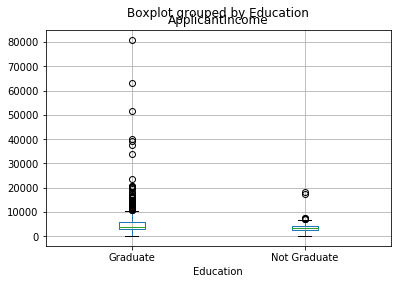

In [125]:
# Box Plot for ApplicantIncome by Education of train.csv

df.boxplot(column='ApplicantIncome', by = 'Education')

In [126]:
# Graduates tend to have higher incomes

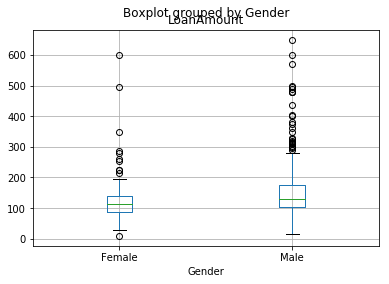

In [127]:


df.boxplot(column='LoanAmount', by = 'Gender')

In [128]:
# We can see Males overall seem to be more likely to get approved for a loan.

In [129]:
#removing null values from dataset to construct decision tree and avoid NAN errors 

fullData.dropna()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,Type
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No,Train
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes,Train
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No,Train
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No,Train
5,5417,4196.0,1.0,2,Graduate,Male,267.0,360.0,LP001011,Y,Yes,Urban,Yes,Train
6,2333,1516.0,1.0,0,Not Graduate,Male,95.0,360.0,LP001013,Y,Yes,Urban,No,Train
7,3036,2504.0,0.0,3+,Graduate,Male,158.0,360.0,LP001014,N,Yes,Semiurban,No,Train
8,4006,1526.0,1.0,2,Graduate,Male,168.0,360.0,LP001018,Y,Yes,Urban,No,Train
9,12841,10968.0,1.0,1,Graduate,Male,349.0,360.0,LP001020,N,Yes,Semiurban,No,Train
10,3200,700.0,1.0,2,Graduate,Male,70.0,360.0,LP001024,Y,Yes,Urban,No,Train


In [130]:
#  decision tree

In [131]:
#getting data from training file and dropping null values to create decision tree to avoid NAN errors 
df = pd.read_csv("train.csv").dropna()

#Classifying applicant income, loan amount with loan status
feature_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',]
X = df[feature_cols] 
y = df.Loan_Status

In [132]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)   #test size = 25%

In [133]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)



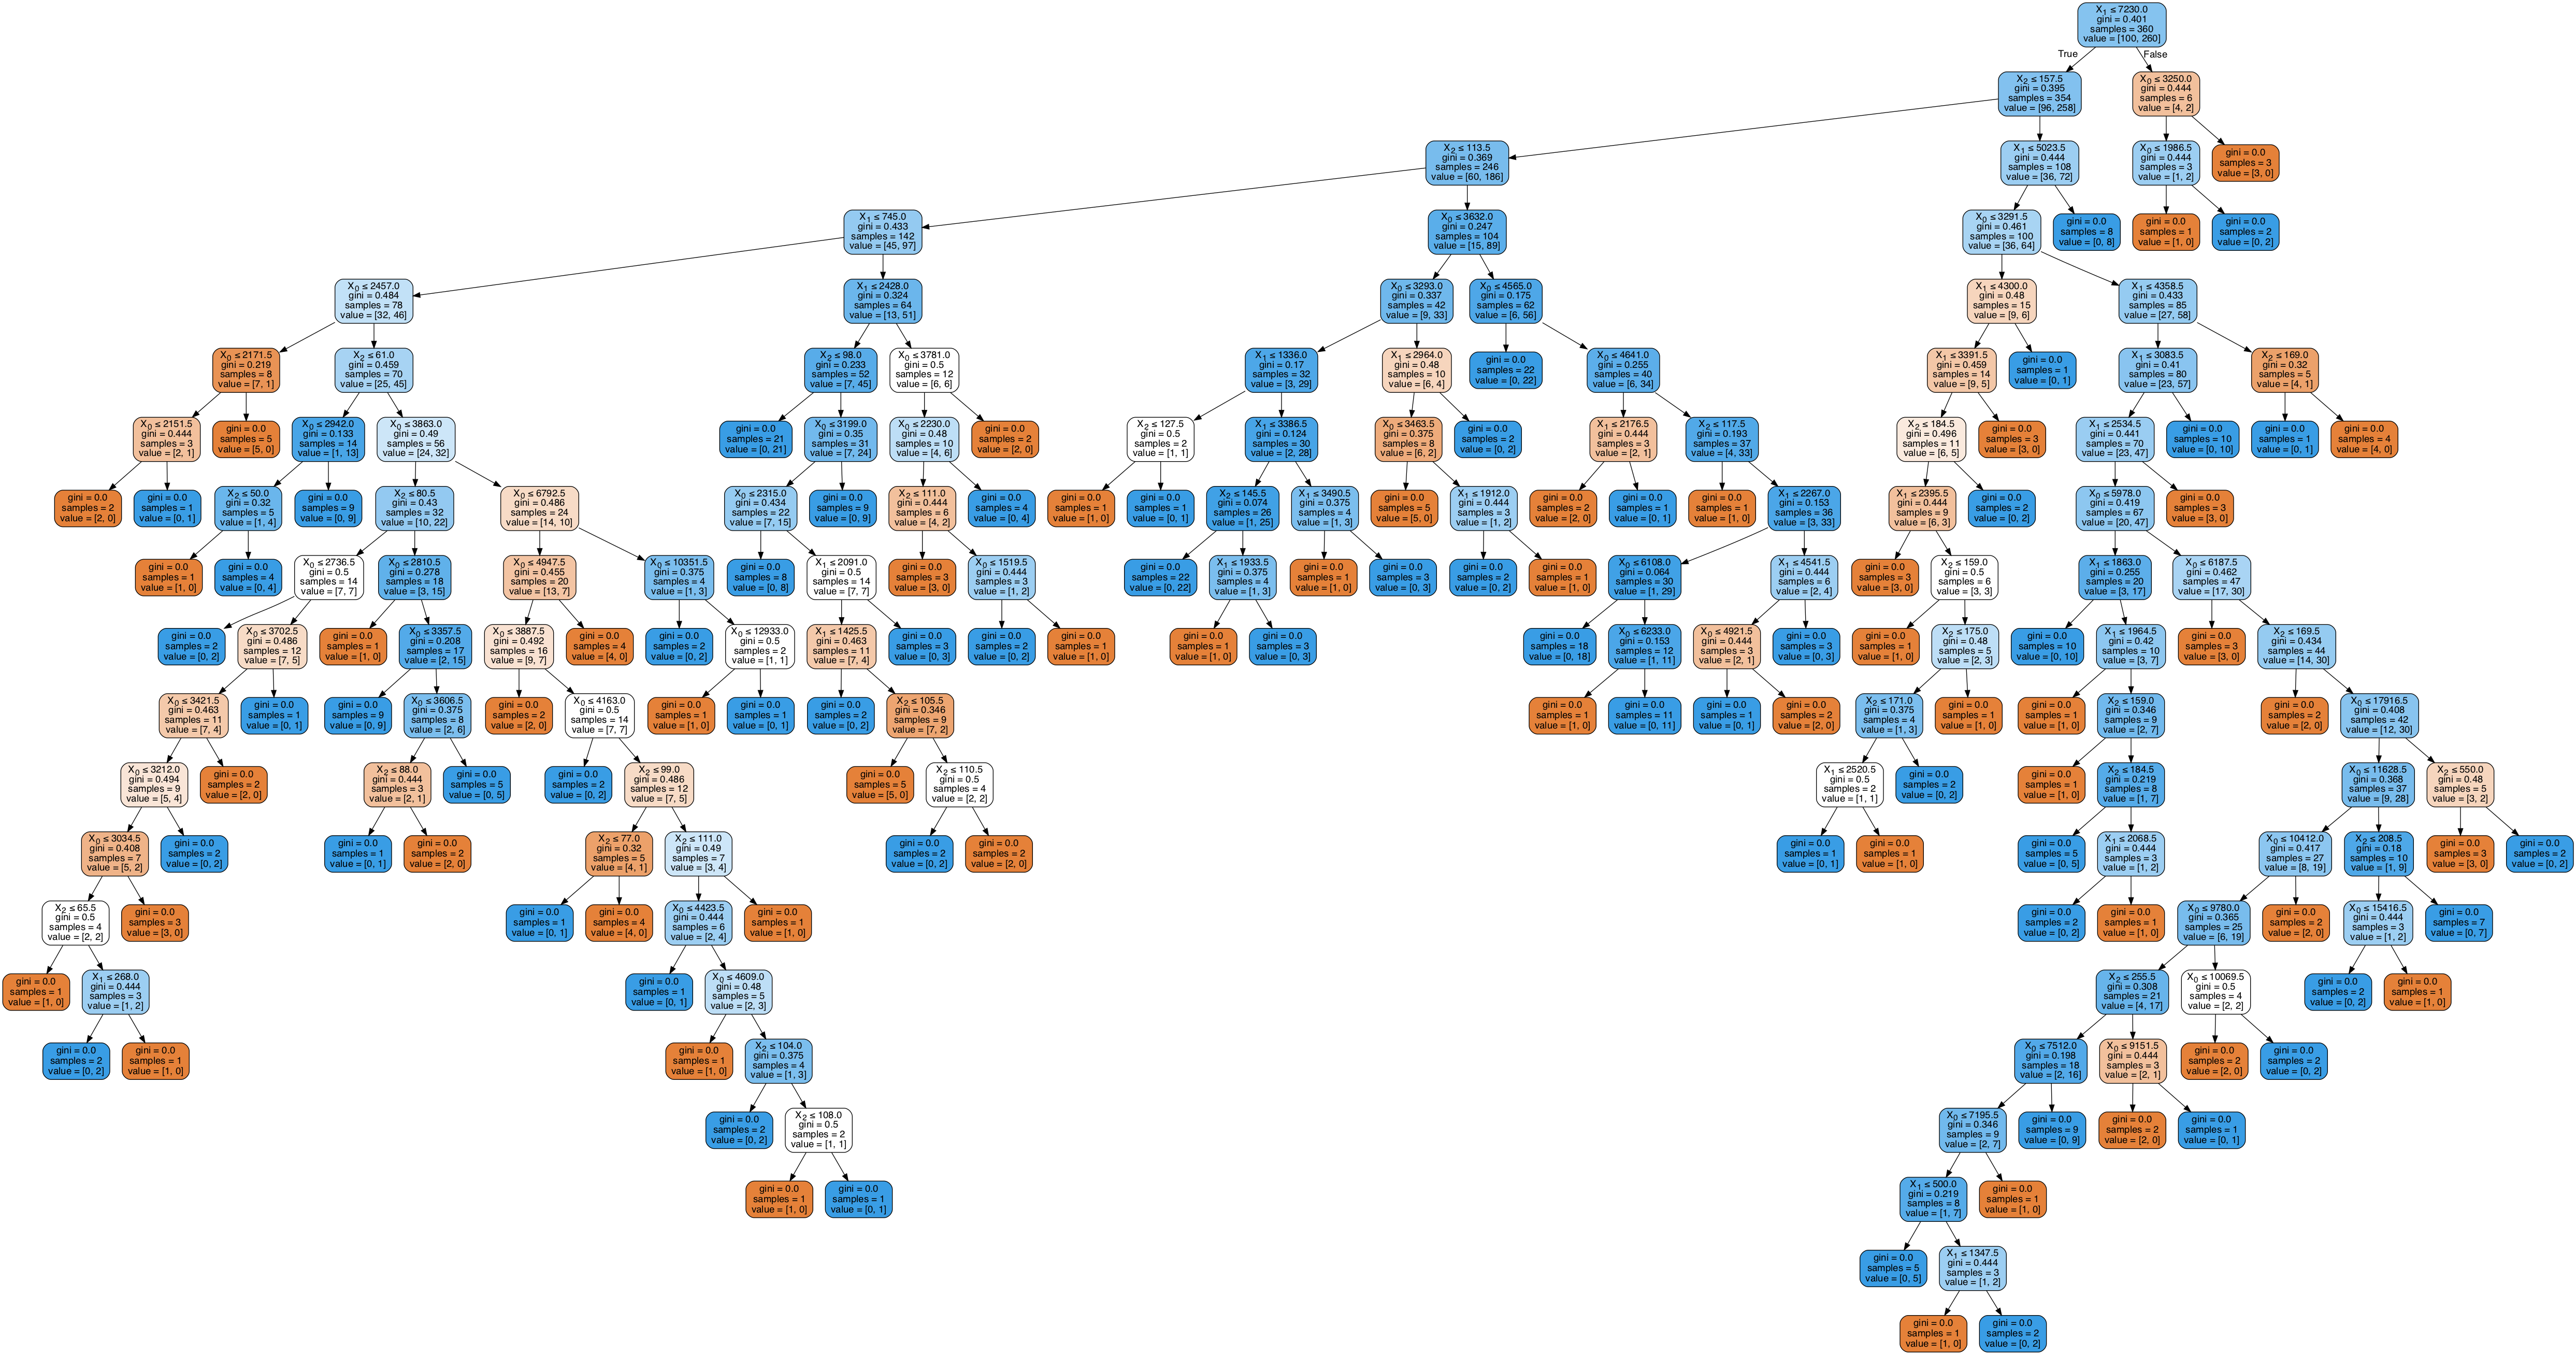

In [134]:
#display the decision tree 

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



In [135]:
#create confusion matrix for accuracy 

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  


#accuracy of decision tree classifier
score = clf.score(X_test, y_test)
print(score)




[[15 33]
 [18 54]]
              precision    recall  f1-score   support

           N       0.45      0.31      0.37        48
           Y       0.62      0.75      0.68        72

   micro avg       0.57      0.57      0.57       120
   macro avg       0.54      0.53      0.52       120
weighted avg       0.55      0.57      0.56       120

0.575


In [136]:
#using logistic Regression for second classifier 

from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()

logisticRegr.fit(X_train, y_train)

predictions = logisticRegr.predict(X_test)

print(confusion_matrix(y_test, predictions)) 
print(classification_report(y_test, predictions))  


#accuracy of logistic regression  
score = logisticRegr.score(X_test, y_test)
print(score)



[[ 0 48]
 [ 0 72]]
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        48
           Y       0.60      1.00      0.75        72

   micro avg       0.60      0.60      0.60       120
   macro avg       0.30      0.50      0.37       120
weighted avg       0.36      0.60      0.45       120

0.6


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [137]:
#Since logistic regression has higher accuracy than decision tree classifier, its a better algorithim for our data.